# GPT4

**Note:**
<div class="alert alert-block alert-info">

1. This notebook presents the output of GPT4 with little to no human assistance. Intervention is only introduced to ensure code is able to run and proceed to the next stage.
2. Boxes highlighted in yellow indicates warning. This indicates the step where we think the LLM produces a somewhat problematic output, or misses out on important thought process. Some minor modifications may be made to the LLM output to ensure the code proceeds to run.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../../data/raw/hotel_reservations.csv')

# Display the first few rows of the dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = df.isnull().sum()

# Convert categorical variables to numeric using Label Encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_cols:
    if col != 'booking_status':  # Exclude the target variable from encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Encoding target variable
y = LabelEncoder().fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the missing values if any, and the shapes of the training and testing sets
missing_values, X_train.shape, X_test.shape

(Booking_ID                              0
 no_of_adults                            0
 no_of_children                          0
 no_of_weekend_nights                    0
 no_of_week_nights                       0
 type_of_meal_plan                       0
 required_car_parking_space              0
 room_type_reserved                      0
 lead_time                               0
 arrival_year                            0
 arrival_month                           0
 arrival_date                            0
 market_segment_type                     0
 repeated_guest                          0
 no_of_previous_cancellations            0
 no_of_previous_bookings_not_canceled    0
 avg_price_per_room                      0
 no_of_special_requests                  0
 booking_status                          0
 dtype: int64,
 (25392, 18),
 (10883, 18))

In [3]:
# Data Quality Check

# Checking for any duplicates in the dataset
duplicates = df.duplicated().sum()

# Rechecking for missing values in the entire dataset
missing_values_total = df.isnull().sum().sum()

# Checking data types to ensure they are appropriate for each feature
data_types = df.dtypes

duplicates, missing_values_total, data_types


(0,
 0,
 Booking_ID                                int64
 no_of_adults                              int64
 no_of_children                            int64
 no_of_weekend_nights                      int64
 no_of_week_nights                         int64
 type_of_meal_plan                         int64
 required_car_parking_space                int64
 room_type_reserved                        int64
 lead_time                                 int64
 arrival_year                              int64
 arrival_month                             int64
 arrival_date                              int64
 market_segment_type                       int64
 repeated_guest                            int64
 no_of_previous_cancellations              int64
 no_of_previous_bookings_not_canceled      int64
 avg_price_per_room                      float64
 no_of_special_requests                    int64
 booking_status                           object
 dtype: object)

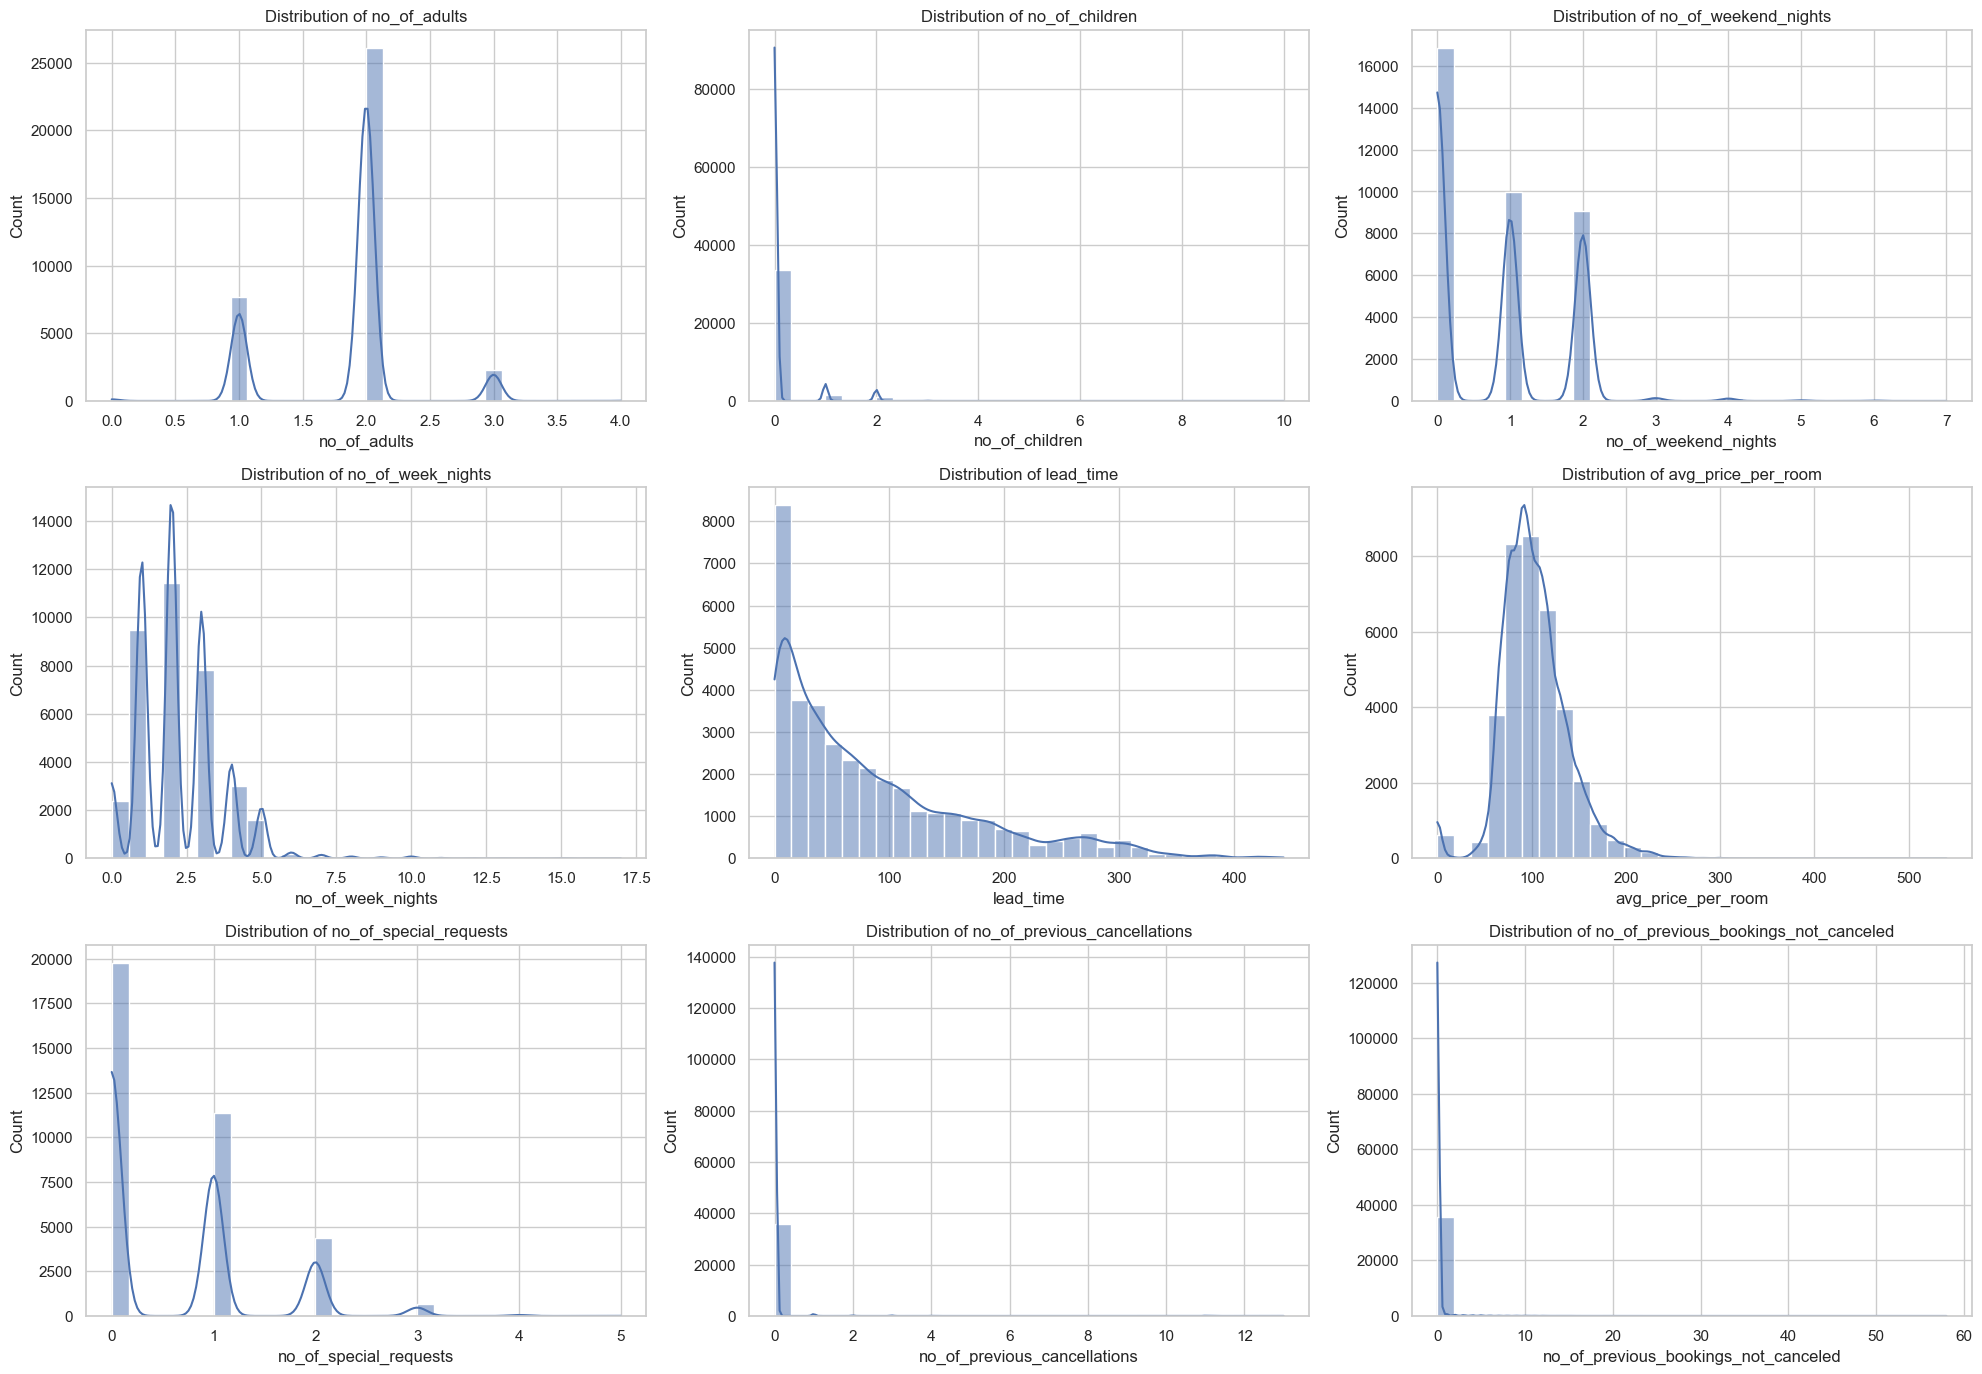

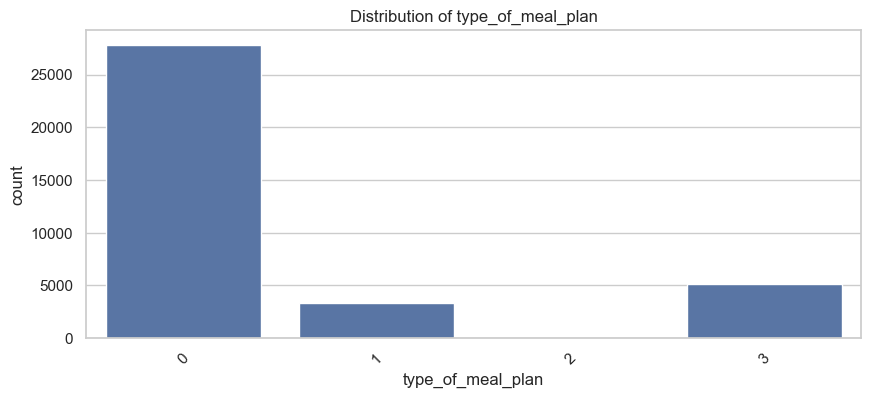

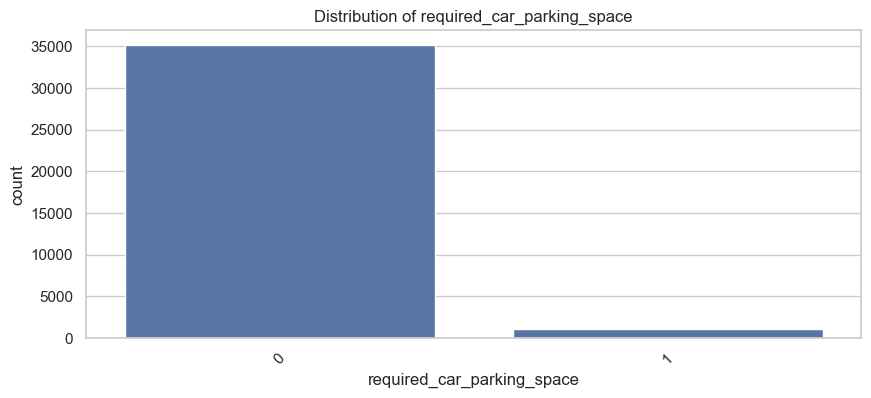

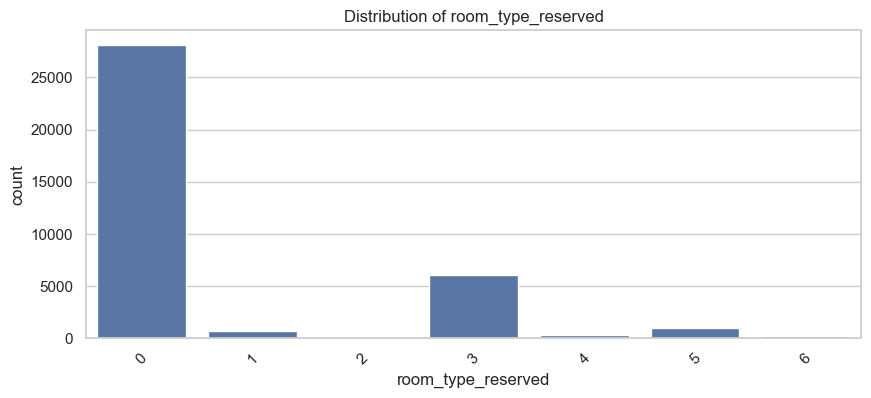

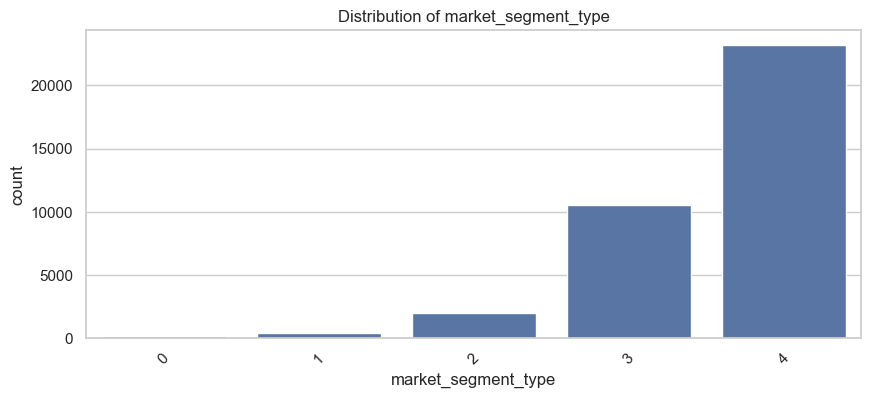

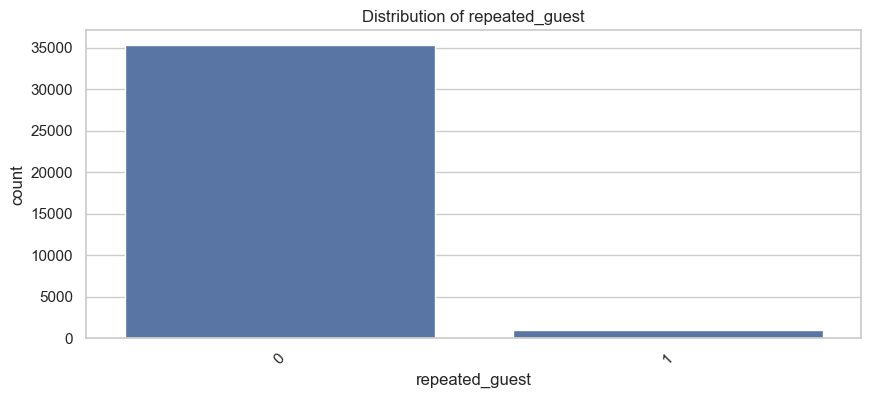

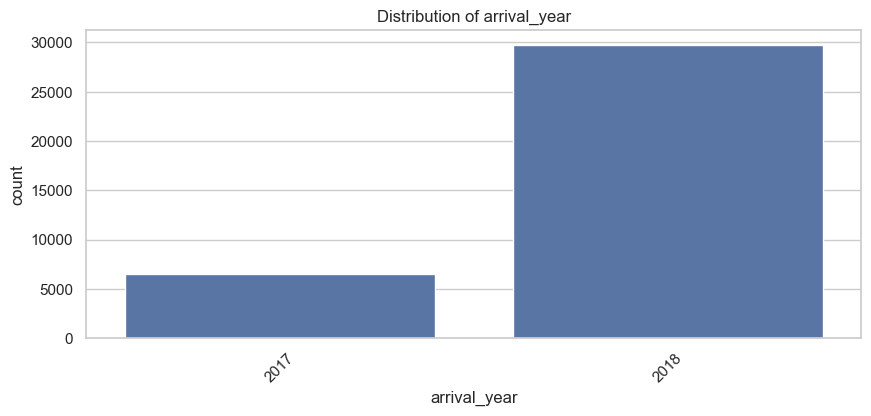

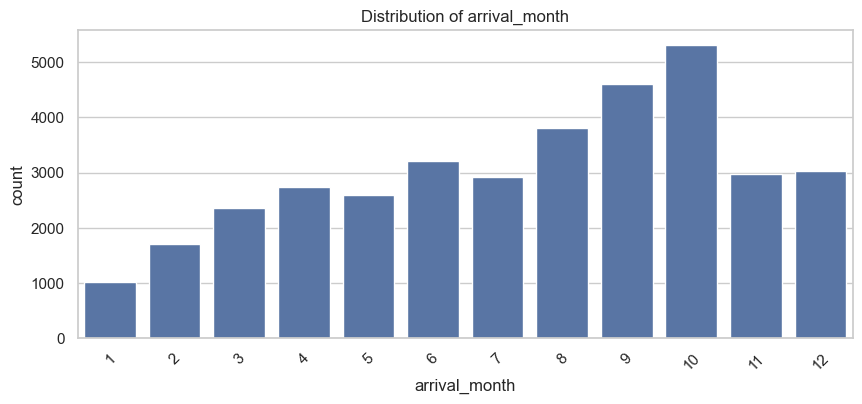

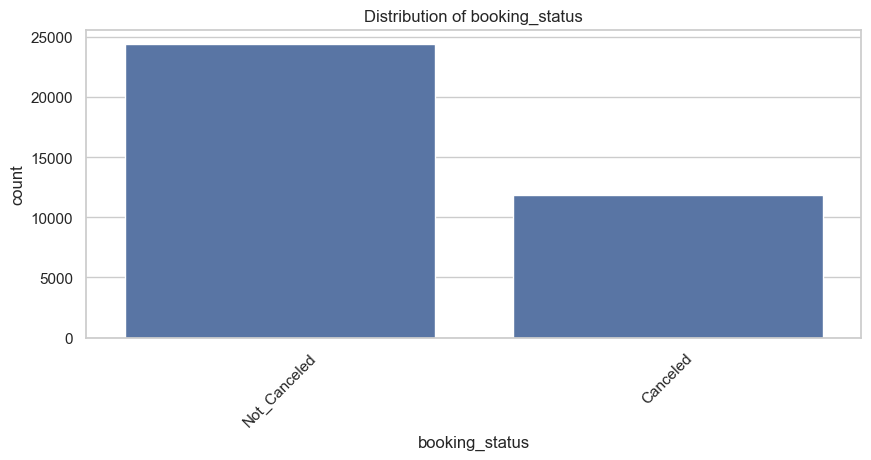

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Defining the figure size for the subplots
plt.figure(figsize=(20, 18))

# Plotting distributions of numerical features
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                  'lead_time', 'avg_price_per_room', 'no_of_special_requests', 'no_of_previous_cancellations',
                  'no_of_previous_bookings_not_canceled']

for index, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, index)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

# For categorical variables, we'll display their distribution separately to avoid cluttering the numerical distribution visuals.
categorical_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                    'market_segment_type', 'repeated_guest', 'arrival_year', 'arrival_month', 'booking_status']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


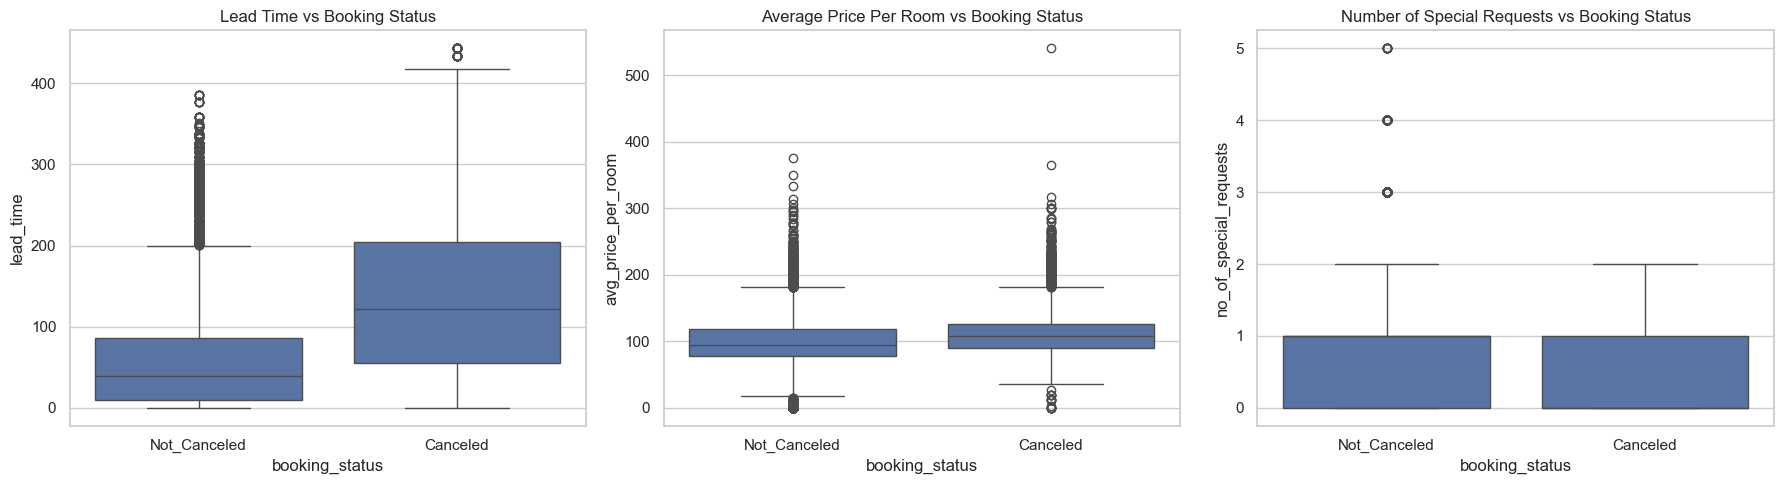

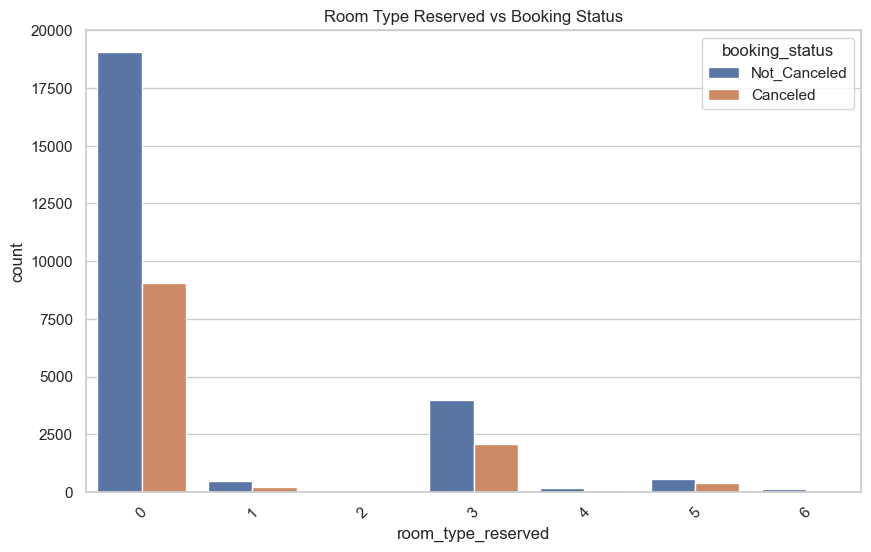

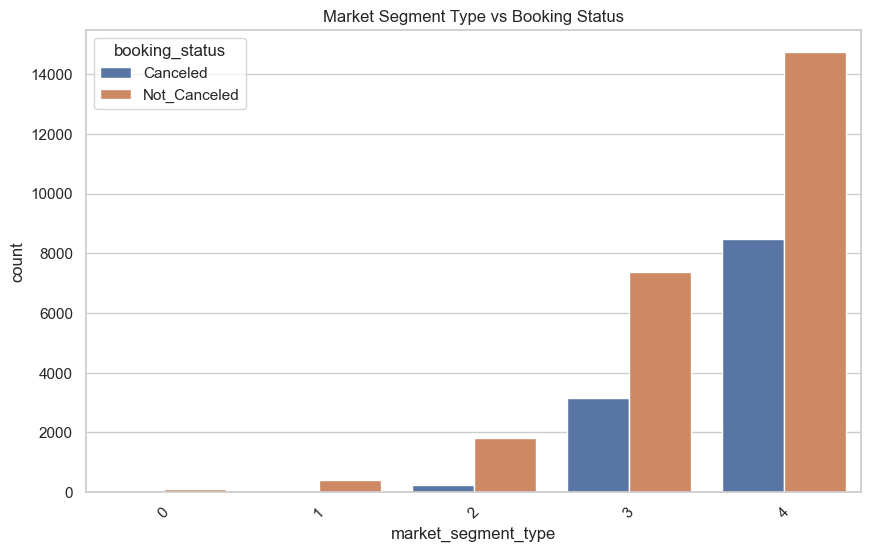

In [5]:
# For the bivariate analysis, we'll look at a few key relationships:
# 1. The relationship between lead time and booking status
# 2. The relationship between average price per room and booking status
# 3. The relationship between number of special requests and booking status

# We will use box plots for numerical vs categorical comparison and count plots for categorical relationships

plt.figure(figsize=(18, 5))

# Lead time vs Booking Status
plt.subplot(1, 3, 1)
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Lead Time vs Booking Status')

# Average price per room vs Booking Status
plt.subplot(1, 3, 2)
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.title('Average Price Per Room vs Booking Status')

# Number of special requests vs Booking Status
plt.subplot(1, 3, 3)
sns.boxplot(x='booking_status', y='no_of_special_requests', data=df)
plt.title('Number of Special Requests vs Booking Status')

plt.tight_layout()
plt.show()

# Exploring the relationship between room type reserved and booking status through a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.title('Room Type Reserved vs Booking Status')
plt.xticks(rotation=45)
plt.show()

# Exploring the relationship between market segment type and booking status
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title('Market Segment Type vs Booking Status')
plt.xticks(rotation=45)
plt.show()


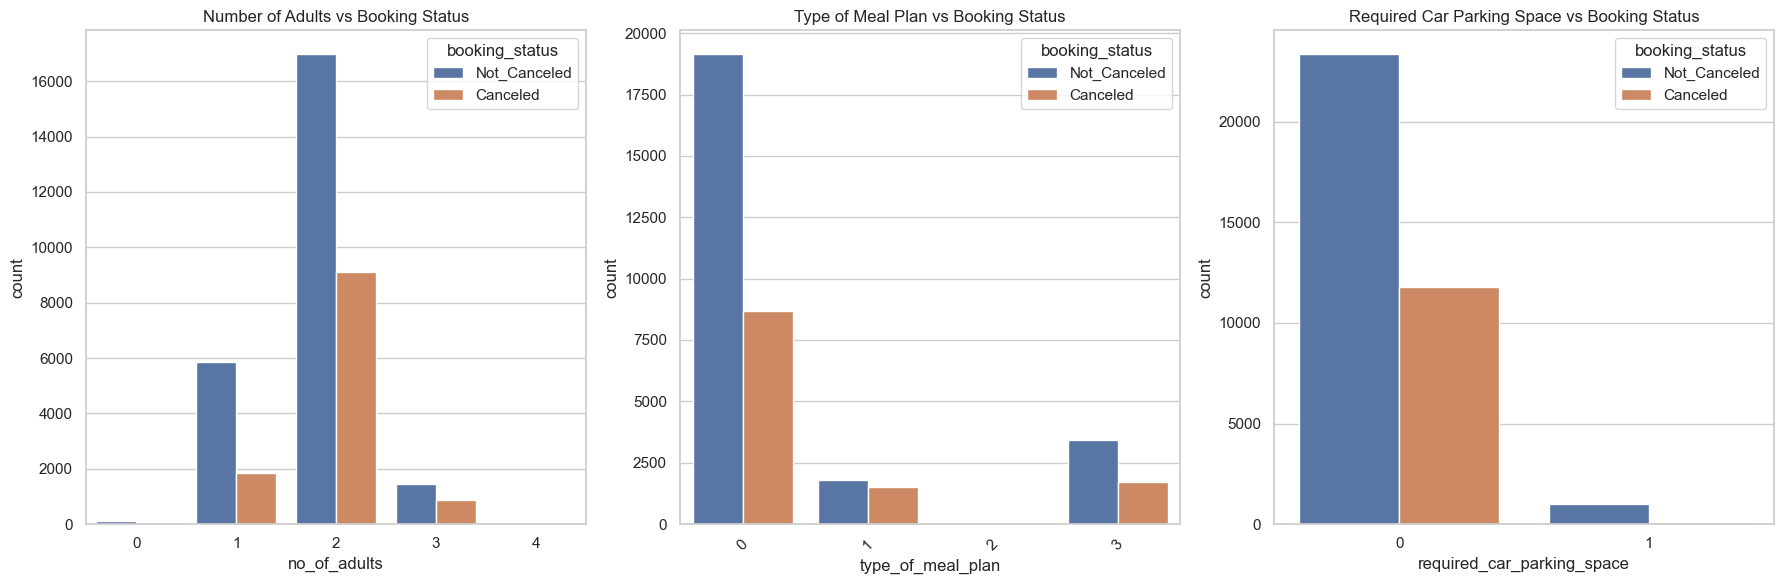

In [6]:
# Adjusting figure size for better visualization
plt.figure(figsize=(18, 6))

# Number of Adults vs Booking Status
plt.subplot(1, 3, 1)
sns.countplot(x='no_of_adults', hue='booking_status', data=df)
plt.title('Number of Adults vs Booking Status')

# Type of Meal Plan vs Booking Status
plt.subplot(1, 3, 2)
sns.countplot(x='type_of_meal_plan', hue='booking_status', data=df)
plt.title('Type of Meal Plan vs Booking Status')
plt.xticks(rotation=45)

# Required Car Parking Space vs Booking Status
plt.subplot(1, 3, 3)
sns.countplot(x='required_car_parking_space', hue='booking_status', data=df)
plt.title('Required Car Parking Space vs Booking Status')

plt.tight_layout()
plt.show()